In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from matplotlib import pyplot as plt

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns =30

## PLACEs data processing

In [43]:
# read cdc PLACEs health data
PLACEs = pd.read_csv('./Data/Raw_Data/PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2021_release.csv'
                    ,usecols=['Year','StateAbbr','CountyName','Category','Measure','Data_Value','TotalPopulation','Geolocation','LocationID','MeasureId','CategoryID']
                    )
PLACEs.head()

Year StateAbbr CountyName         Category  \
0  2019        AR  Craighead  Health Outcomes   
1  2019        AR  Craighead  Health Outcomes   
2  2019        CA    Alameda  Health Outcomes   
3  2019        CA    Alameda  Health Outcomes   
4  2019        CA    Alameda  Health Outcomes   

                                   Measure  Data_Value  TotalPopulation  \
0      Stroke among adults aged >=18 years         3.5             6516   
1  Depression among adults aged >=18 years        26.2             6139   
2      Stroke among adults aged >=18 years         7.4             2788   
3     Obesity among adults aged >=18 years        26.3             2238   
4   Arthritis among adults aged >=18 years        15.8             2819   

                        Geolocation  LocationID CategoryID   MeasureId  
0  POINT (-90.71822092 35.81904551)  5031000300    HLTHOUT      STROKE  
1  POINT (-90.61608228 35.87373244)  5031000501    HLTHOUT  DEPRESSION  
2  POINT (-122.2706945 37.80052483)  6001403000    HLTHOUT      STROKE  
3  POINT (-122.2754581 37.80233855)  6001403100    HLTHOUT     OBESITY  
4  POINT (-122.2536907 37.82326962)  6001404000    HLTHOUT   ARTHRITIS

In [44]:
# select data in NYC
PLACEsNY = PLACEs[PLACEs['StateAbbr'] == 'NY']
PLACEsNY = PLACEsNY[PLACEsNY['CountyName'].isin(['Bronx','Kings','New York','Queens','Richmond'])]
PLACEsNY.head()

Year StateAbbr CountyName               Category  \
1240910  2019        NY      Bronx  Health Risk Behaviors   
1240911  2019        NY      Bronx        Health Outcomes   
1240914  2018        NY      Bronx             Prevention   
1240916  2018        NY      Bronx             Prevention   
1240918  2019        NY      Bronx        Health Outcomes   

                                                   Measure  Data_Value  \
1240910  No leisure-time physical activity among adults...        34.9   
1240911    Diagnosed diabetes among adults aged >=18 years        15.7   
1240914  Fecal occult blood test, sigmoidoscopy, or col...        43.6   
1240916  Older adult men aged >=65 years who are up to ...        24.1   
1240918  Cancer (excluding skin cancer) among adults ag...         4.0   

         TotalPopulation                       Geolocation   LocationID  \
1240910             1907   POINT (-73.9128415 40.81821599)  36005007100   
1240911             2303  POINT (-73.85902728 40.87309199)  36005037000   
1240914            11091   POINT (-73.88265696 40.7911001)  36005000100   
1240916             3598  POINT (-73.83457776 40.88631153)  36005048400   
1240918             1699  POINT (-73.91326373 40.84449183)  36005022702   

        CategoryID     MeasureId  
1240910    RISKBEH           LPA  
1240911    HLTHOUT      DIABETES  
1240914    PREVENT  COLON_SCREEN  
1240916    PREVENT         COREM  
1240918    HLTHOUT        CANCER

/Users/taoliang/opt/anaconda3/envs/ADS/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


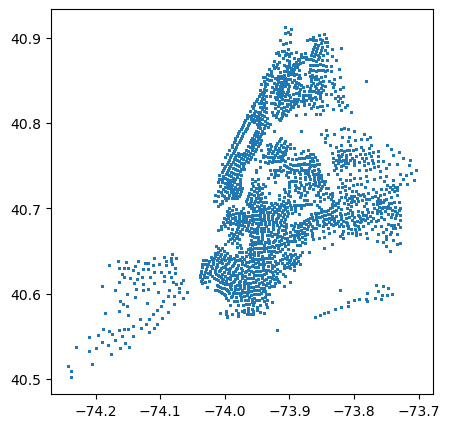

In [92]:
# take a look at the spatial distribution of health data
a = PLACEsNY.copy()
a['Geolocation'] = a['Geolocation'].apply(wkt.loads)
a = gpd.GeoDataFrame(a,geometry=a['Geolocation'],crs={'init':'epsg:4326'})
a.plot(markersize=1, figsize=(5,5))
plt.show()

### sjoin with ct2010 census tract boundary 
### (Although the latest file is ct2020, consider for compatibility with all data location id, we use ct2010)

In [57]:
ct2010 = gpd.read_file('./Data/Raw_Data/2010_Census_Tracts/geo_export_56c76d30-fb47-4fa6-839d-06b327544523.shp')
ct2010.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel ntacode  \
0         5    5000900  Staten Island          E  000900       9    SI22   
1         1    1009800      Manhattan          I  009800      98    MN19   
2         1    1010200      Manhattan          I  010200     102    MN17   
3         1    1010400      Manhattan          I  010400     104    MN17   
4         1    1011300      Manhattan          I  011300     113    MN17   

                                     ntaname  puma    shape_area   shape_leng  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.200308   
2                      Midtown-Midtown South  3807  1.860993e+06  5687.802439   
3                      Midtown-Midtown South  3807  1.864600e+06  5693.036367   
4                      Midtown-Midtown South  3807  1.890907e+06  5699.860640   

                                            geometry  
0  POLYGON ((-74.07921 40.64343, -74.07914 40.643...  
1  POLYGON ((-73.96433 40.75638, -73.96479 40.755...  
2  POLYGON ((-73.97124 40.76094, -73.97170 40.760...  
3  POLYGON ((-73.97446 40.76229, -73.97491 40.761...  
4  POLYGON ((-73.98412 40.75484, -73.98460 40.754...

In [60]:
# check null value
ct2010.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   boro_code   2165 non-null   object  
 1   boro_ct201  2165 non-null   object  
 2   boro_name   2165 non-null   object  
 3   cdeligibil  2164 non-null   object  
 4   ct2010      2165 non-null   object  
 5   ctlabel     2165 non-null   object  
 6   ntacode     2165 non-null   object  
 7   ntaname     2165 non-null   object  
 8   puma        2165 non-null   object  
 9   shape_area  2165 non-null   float64 
 10  shape_leng  2165 non-null   float64 
 11  geometry    2165 non-null   geometry
dtypes: float64(2), geometry(1), object(9)
memory usage: 203.1+ KB


In [59]:
# check duplicate
ct2010[ct2010.duplicated()]

Empty GeoDataFrame
Columns: [boro_code, boro_ct201, boro_name, cdeligibil, ct2010, ctlabel, ntacode, ntaname, puma, shape_area, shape_leng, geometry]
Index: []

In [81]:
# crate ct2010 GeoID for match PLACEs data

ct2010['GeoID']=0
for i in range(len(ct2010['boro_name'])):
    if (ct2010['boro_name'][i]=='Manhattan'):
        ct2010['GeoID'][i] = '36061'+ ct2010['ct2010'][i]
    
    elif (ct2010['boro_name'][i]=='Bronx'):
        ct2010['GeoID'][i] = '36005'+ ct2010['ct2010'][i]
        
    elif (ct2010['boro_name'][i]=='Queens'):
        ct2010['GeoID'][i] = '36081'+ ct2010['ct2010'][i]
    
    elif (ct2010['boro_name'][i]=='Brooklyn'):
        ct2010['GeoID'][i] = '36047'+ ct2010['ct2010'][i]
    
    elif (ct2010['boro_name'][i]=='Staten Island'):
        ct2010['GeoID'][i] = '36085'+ ct2010['ct2010'][i]
    
    else:
        print('no')

ct2010.head()  

/Users/taoliang/opt/anaconda3/envs/ADS/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/taoliang/opt/anaconda3/envs/ADS/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/taoliang/opt/anaconda3/envs/ADS/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import ke

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel ntacode  \
0         5    5000900  Staten Island          E  000900       9    SI22   
1         1    1009800      Manhattan          I  009800      98    MN19   
2         1    1010200      Manhattan          I  010200     102    MN17   
3         1    1010400      Manhattan          I  010400     104    MN17   
4         1    1011300      Manhattan          I  011300     113    MN17   

                                     ntaname  puma    shape_area   shape_leng  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.200308   
2                      Midtown-Midtown South  3807  1.860993e+06  5687.802439   
3                      Midtown-Midtown South  3807  1.864600e+06  5693.036367   
4                      Midtown-Midtown South  3807  1.890907e+06  5699.860640   

                                            geometry        GeoID  
0  POLYGON ((-74.07921 40.64343, -74.07914 40.643...  36085000900  
1  POLYGON ((-73.96433 40.75638, -73.96479 40.755...  36061009800  
2  POLYGON ((-73.97124 40.76094, -73.97170 40.760...  36061010200  
3  POLYGON ((-73.97446 40.76229, -73.97491 40.761...  36061010400  
4  POLYGON ((-73.98412 40.75484, -73.98460 40.754...  36061011300

In [82]:
# save this geo file
ct2010.to_file('./Data/Processed_Data/ct2010_geoid.geojson', driver='GeoJSON')

In [93]:
len(PLACEsNY)

63498

In [94]:
# health data merge with ct2010 
PLACEsNY_Geo = pd.merge(PLACEsNY, ct2010, left_on='LocationID', right_on='GeoID')
PLACEsNY_Geo = gpd.GeoDataFrame(PLACEsNY_Geo, geometry=PLACEsNY_Geo['geometry'],crs={'init':'epsg:4326'})
len(PLACEsNY_Geo)

/Users/taoliang/opt/anaconda3/envs/ADS/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


63498

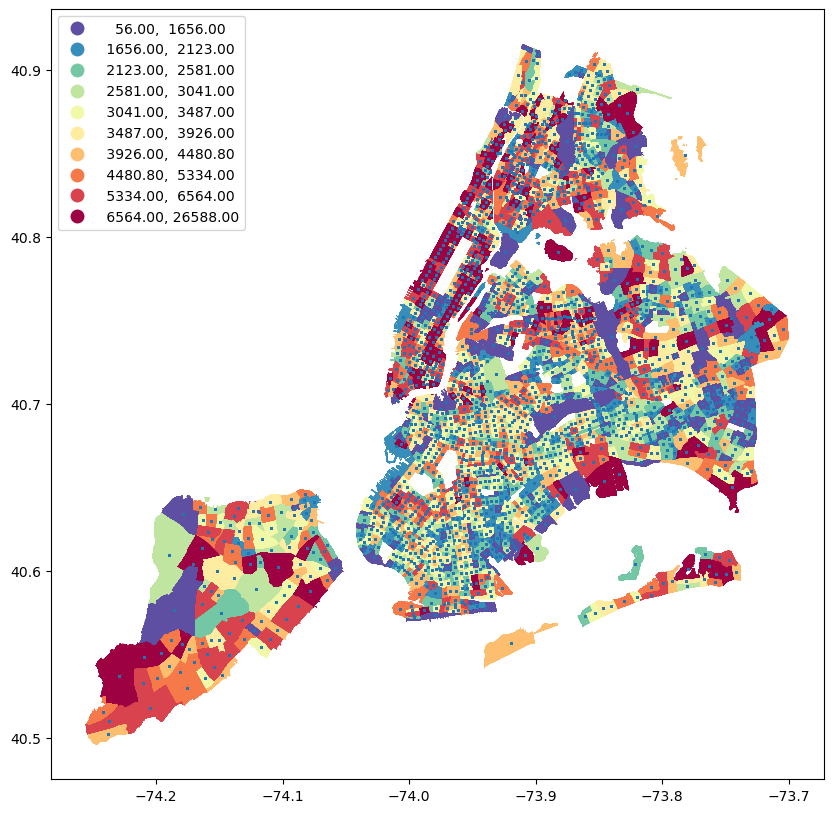

In [97]:
# take a look at if these two data sets merge well
base = PLACEsNY_Geo.plot(column='TotalPopulation', cmap='Spectral_r', 
                              legend=False, scheme='Quantiles', k=10,
                              figsize=(10,10))

a.plot(ax=base, markersize=1, figsize=(10,10));
plt.show()

In [100]:
# fillter out the census tracts which population lower than 1500
PLACEsNY_clean_Geo = PLACEsNY_Geo[PLACEsNY_Geo['TotalPopulation'] >= 1500]
len(PLACEsNY_clean_Geo)                            

59100

In [101]:
PLACEsNY_clean_Geo.describe()

Year    Data_Value  TotalPopulation    LocationID  \
count  59100.000000  59100.000000     59100.000000  5.910000e+04   
mean    2018.733333     30.608037      4067.756853  3.605430e+10   
std        0.442220     26.990995      2053.729602  2.593184e+07   
min     2018.000000      0.600000      1504.000000  3.600500e+10   
25%     2018.000000     11.100000      2594.000000  3.604702e+10   
50%     2019.000000     19.300000      3619.500000  3.604711e+10   
75%     2019.000000     42.425000      5064.000000  3.608103e+10   
max     2019.000000     97.300000     26588.000000  3.608503e+10   

         shape_area    shape_leng         GeoID  
count  5.910000e+04  59100.000000  5.910000e+04  
mean   3.388568e+06   8141.950662  3.605430e+10  
std    5.153369e+06   5578.833543  2.593184e+07  
min    4.478077e+05   2816.869528  3.600500e+10  
25%    1.684237e+06   5605.215521  3.604702e+10  
50%    1.972590e+06   6478.736931  3.604711e+10  
75%    2.967245e+06   8496.803754  3.608103e+10  
max    1.057417e+08  93905.197358  3.608503e+10

In [ ]:
# Check if the county name of PLACE can be matched with the county name of ct2010.

In [111]:
PLACEsNY_clean_Geo.CountyName.unique()

array(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], dtype=object)

In [112]:
PLACEsNY_clean_Geo.boro_name.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [124]:
print(len(PLACEsNY_clean_Geo[(PLACEsNY_clean_Geo['CountyName'] == 'Bronx')\
                       & (PLACEsNY_clean_Geo['boro_name'] != 'Bronx')]))

print(len(PLACEsNY_clean_Geo[(PLACEsNY_clean_Geo['CountyName'] == 'Kings')\
                       & (PLACEsNY_clean_Geo['boro_name'] != 'Brooklyn')]))

print(len(PLACEsNY_clean_Geo[(PLACEsNY_clean_Geo['CountyName'] == 'New York')\
                       & (PLACEsNY_clean_Geo['boro_name'] != 'Manhattan')]))

print(len(PLACEsNY_clean_Geo[(PLACEsNY_clean_Geo['CountyName'] == 'Queens')\
                       & (PLACEsNY_clean_Geo['boro_name'] != 'Queens')]))

print(len(PLACEsNY_clean_Geo[(PLACEsNY_clean_Geo['CountyName'] == 'Richmond')\
                       & (PLACEsNY_clean_Geo['boro_name'] != 'Staten Island')]))

0
0
0
0
0


In [128]:
PLACEsNY_clean_Geo = PLACEsNY_clean_Geo.drop(['CountyName','boro_code','boro_ct201','cdeligibil','ctlabel','puma','LocationID','Geolocation'],axis=1)
PLACEsNY_clean_Geo.head()

Year StateAbbr               Category  \
0  2019        NY  Health Risk Behaviors   
1  2019        NY             Prevention   
2  2018        NY  Health Risk Behaviors   
3  2019        NY        Health Outcomes   
4  2019        NY        Health Outcomes   

                                             Measure  Data_Value  \
0  No leisure-time physical activity among adults...        34.9   
1  Current lack of health insurance among adults ...        23.3   
2  Sleeping less than 7 hours among adults aged >...        41.1   
3  Cancer (excluding skin cancer) among adults ag...         4.7   
4                Stroke among adults aged >=18 years         3.3   

   TotalPopulation CategoryID MeasureId boro_name  ct2010 ntacode  \
0             1907    RISKBEH       LPA     Bronx  007100    BX34   
1             1907    PREVENT   ACCESS2     Bronx  007100    BX34   
2             1907    RISKBEH     SLEEP     Bronx  007100    BX34   
3             1907    HLTHOUT    CANCER     Bronx  007100    BX34   
4             1907    HLTHOUT    STROKE     Bronx  007100    BX34   

                          ntaname    shape_area  shape_leng  \
0  Melrose South-Mott Haven North  2.841871e+06  8603.54257   
1  Melrose South-Mott Haven North  2.841871e+06  8603.54257   
2  Melrose South-Mott Haven North  2.841871e+06  8603.54257   
3  Melrose South-Mott Haven North  2.841871e+06  8603.54257   
4  Melrose South-Mott Haven North  2.841871e+06  8603.54257   

                                            geometry        GeoID  
0  POLYGON ((-73.90842 40.82218, -73.90850 40.821...  36005007100  
1  POLYGON ((-73.90842 40.82218, -73.90850 40.821...  36005007100  
2  POLYGON ((-73.90842 40.82218, -73.90850 40.821...  36005007100  
3  POLYGON ((-73.90842 40.82218, -73.90850 40.821...  36005007100  
4  POLYGON ((-73.90842 40.82218, -73.90850 40.821...  36005007100

In [131]:
# save file
PLACEsNY_clean_Geo.to_file('./Data/Processed_Data/PLACEsNY_clean_Geo.geojson', driver='GeoJSON')

### Separate health status and health outcomes

In [130]:
PLACEsNY_clean_Geo.Category.unique()

array(['Health Risk Behaviors', 'Prevention', 'Health Outcomes',
       'Health Status'], dtype=object)

In [132]:
HStatus = PLACEsNY_clean_Geo[PLACEsNY_clean_Geo['Category'] == 'Health Status']
HOutcomes = PLACEsNY_clean_Geo[PLACEsNY_clean_Geo['Category'] == 'Health Outcomes']

In [219]:
# save file
HStatus.to_file('./Data/Processed_Data/Health_Status.geojson', driver='GeoJSON')
HOutcomes.to_file('./Data/Processed_Data/Health_Outcomes.geojson', driver='GeoJSON')

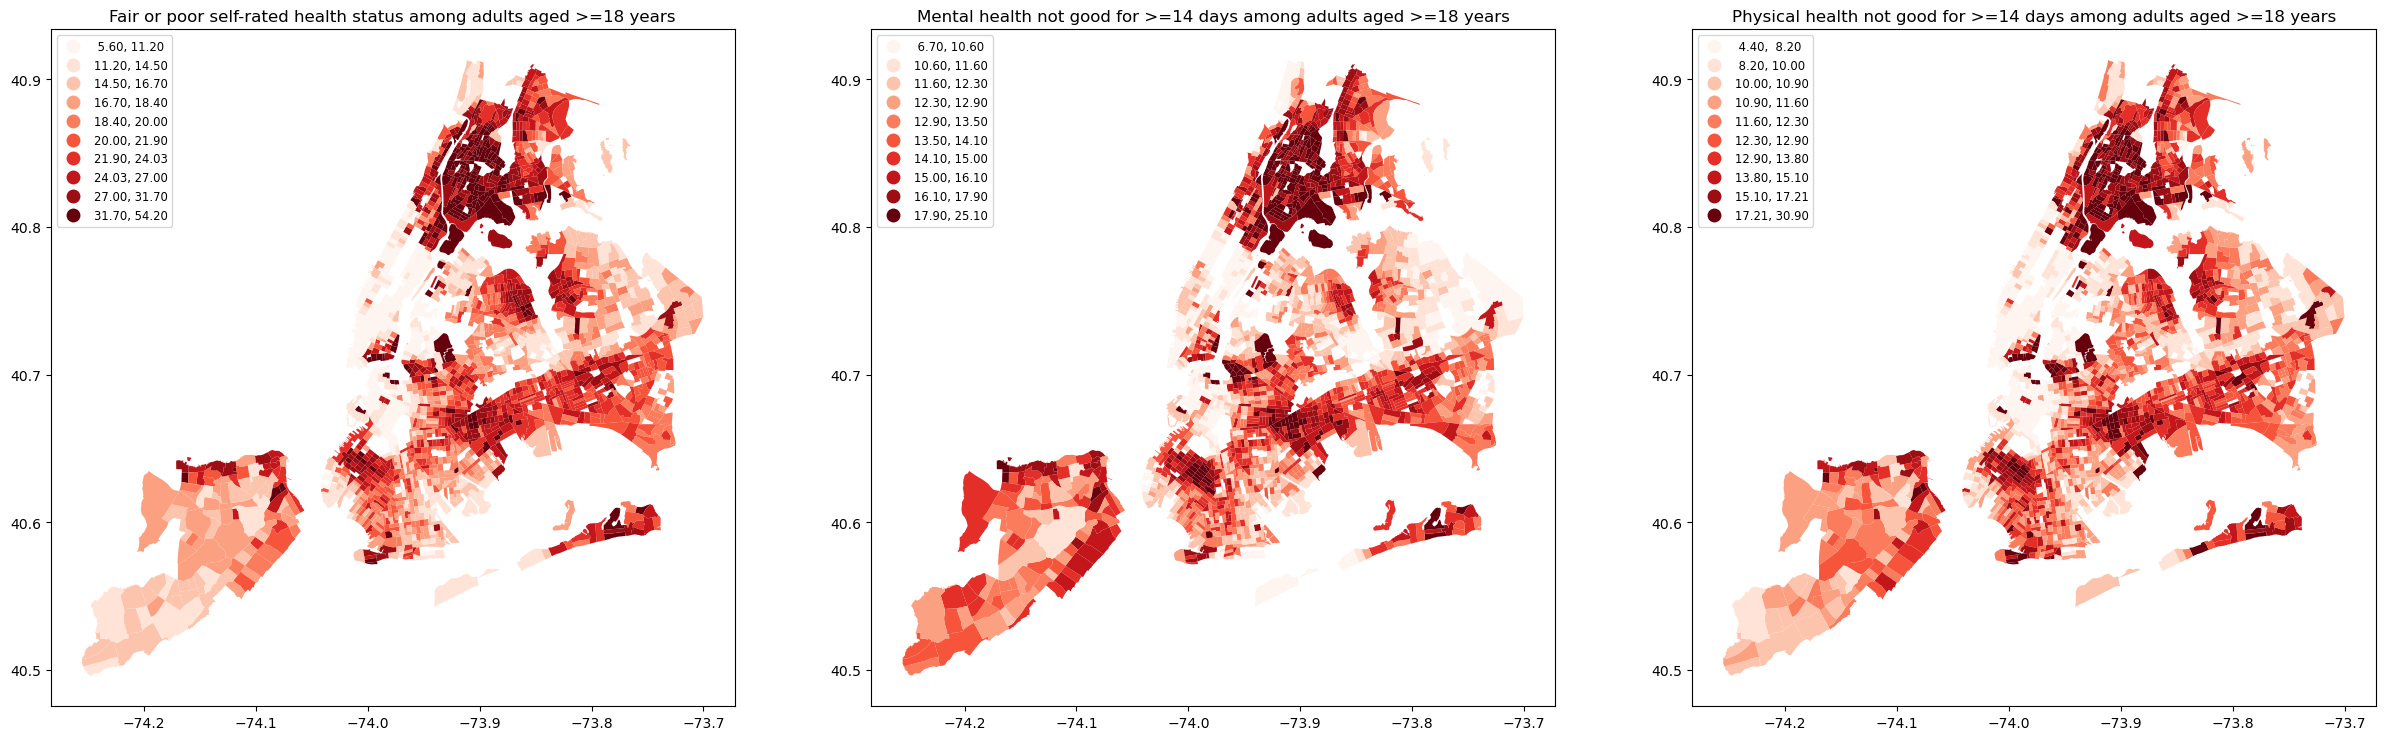

In [189]:
fig, ax = plt.subplots(1,3, figsize=(30,30))

for i,j in enumerate(HStatus['Measure'].unique()):
    HStatus[HStatus['Measure'] == j].plot(ax=ax[i], column='Data_Value', k=10, scheme='Quantiles',cmap='Reds',
                                             legend=True, legend_kwds={'loc':'upper left','fontsize':'small'})
    
    
    label = j
    ax[i].set_title(label)
    
plt.show()

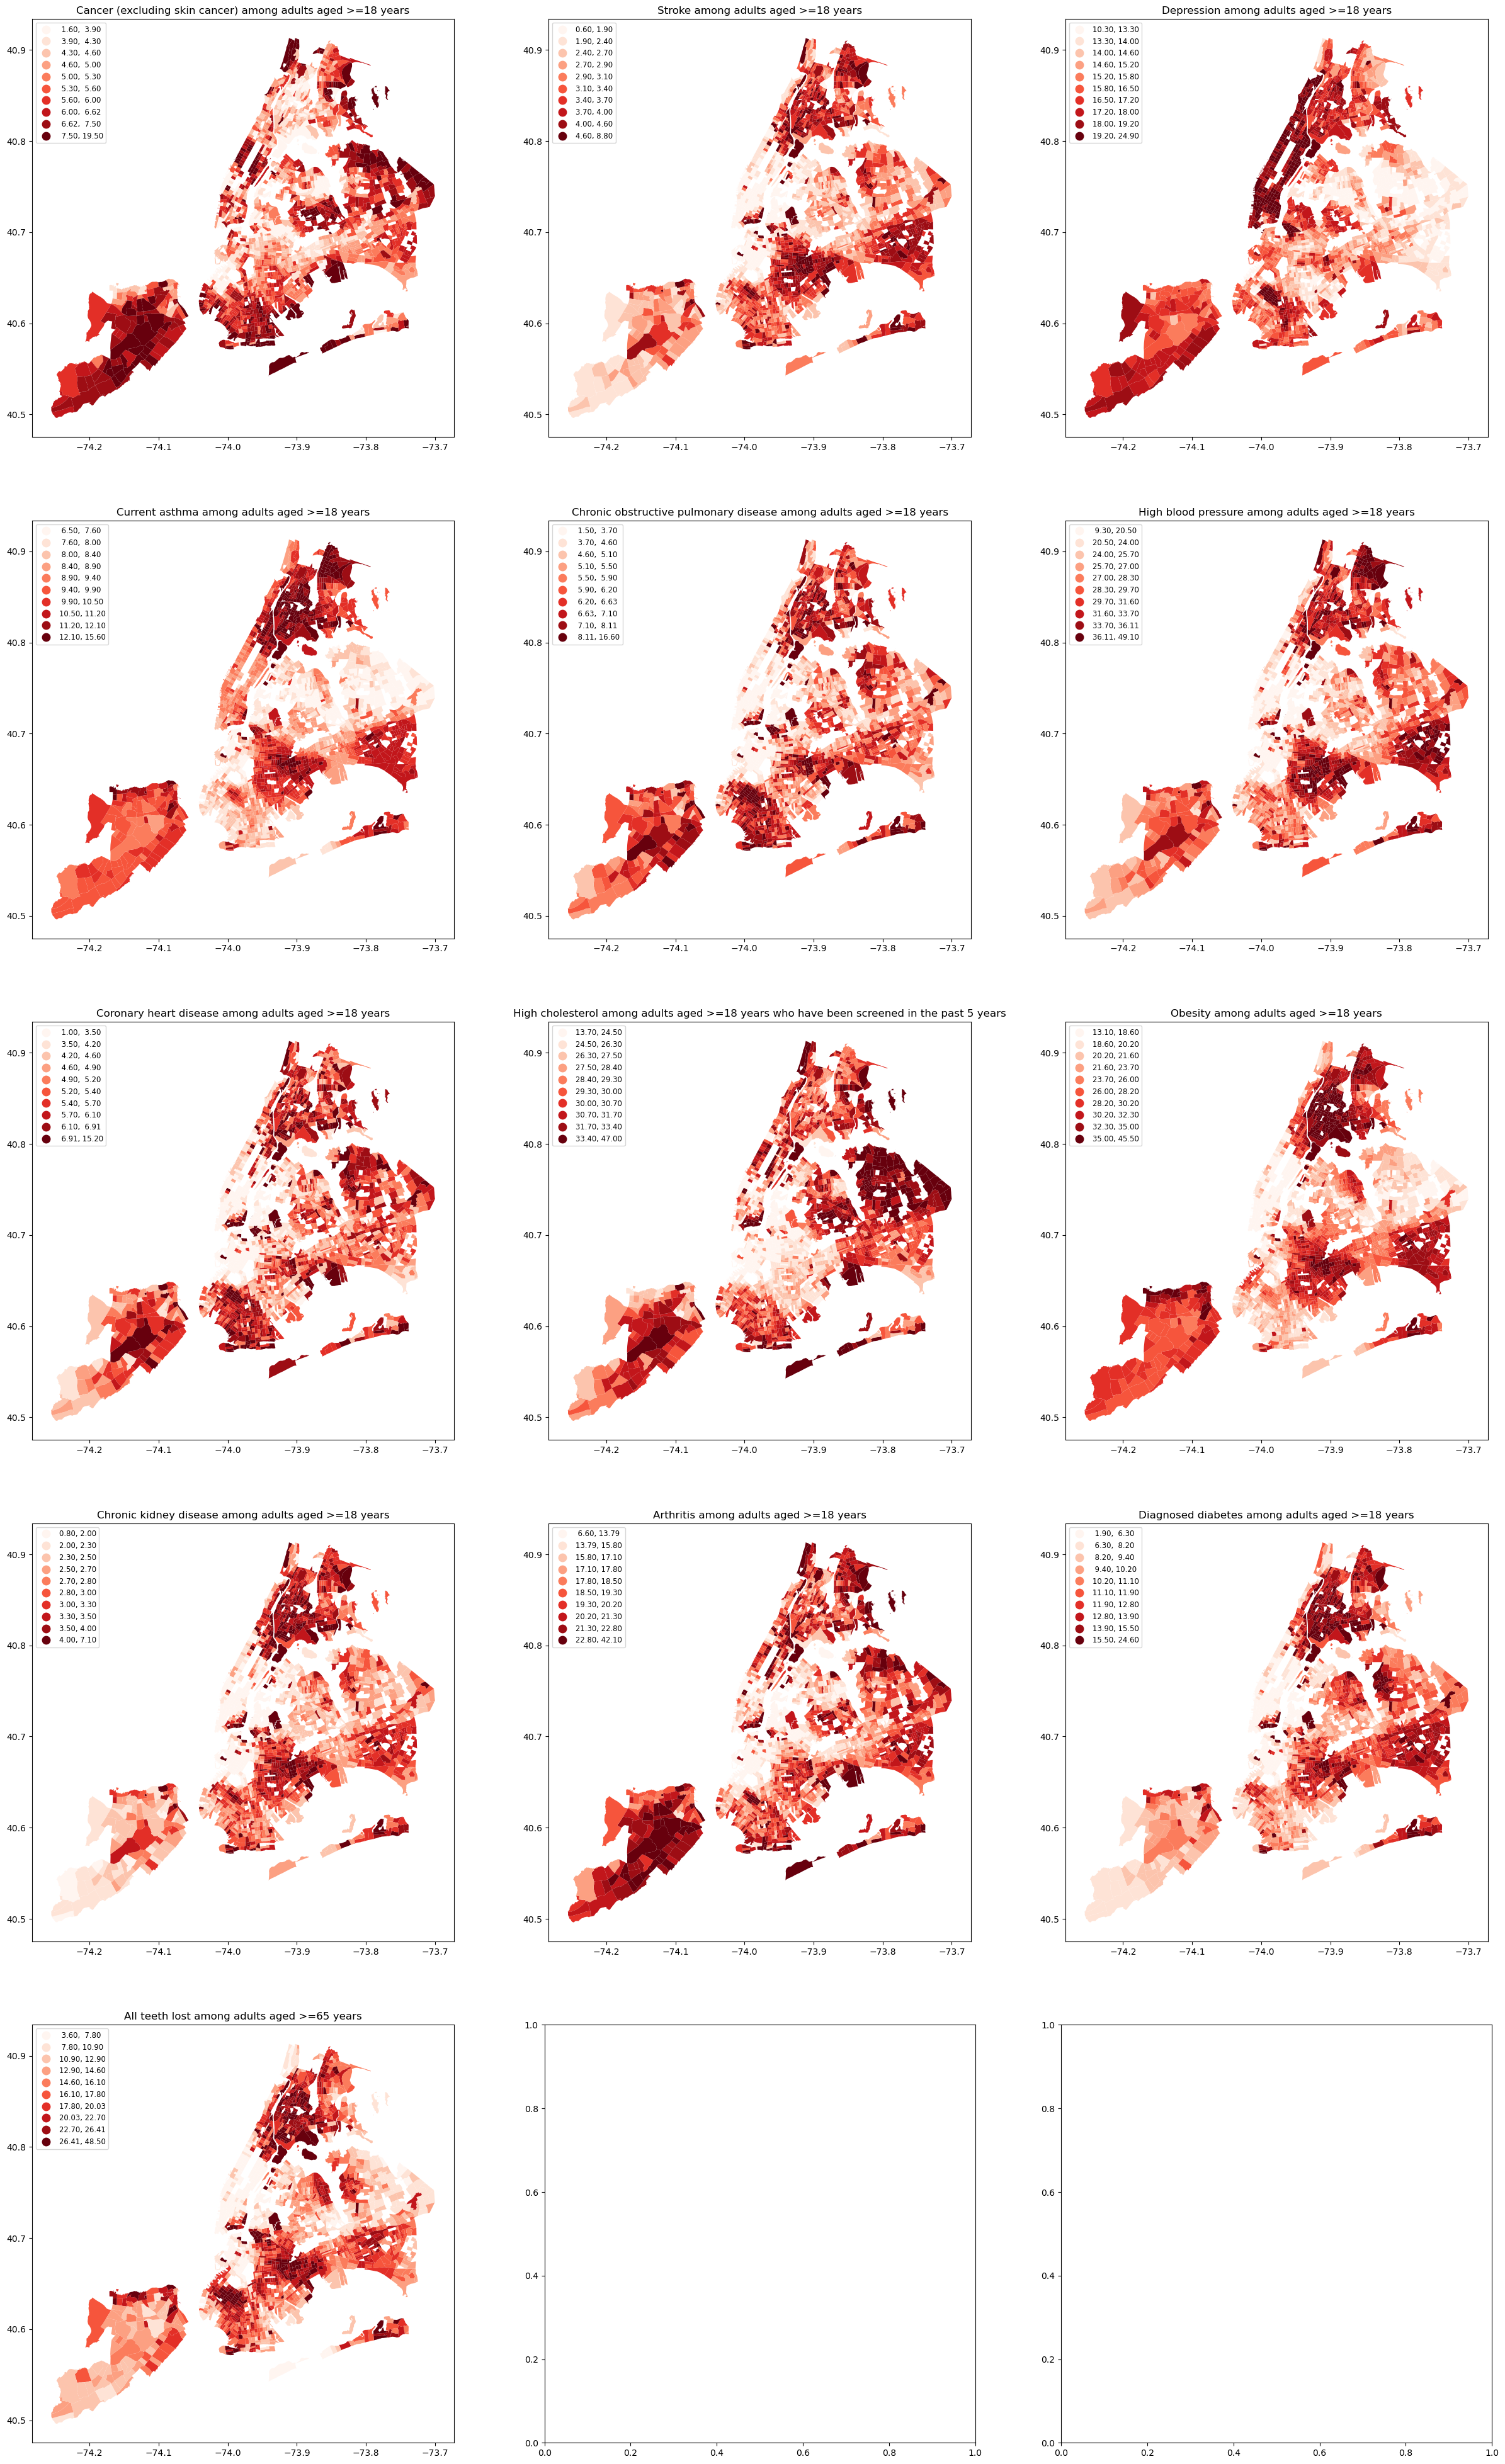

In [218]:
fig, ax = plt.subplots(5,3, figsize=(30,50))

for i,j in enumerate(HOutcomes['Measure'].unique()):
    HOutcomes[HOutcomes['Measure'] == j].plot(ax=ax[i//3][i%3], column='Data_Value', k=10, scheme='Quantiles',cmap='Reds',
                                             legend=True, legend_kwds={'loc':'upper left','fontsize':'small'})
    
    
    label = j
    ax[i//3][i%3].set_title(label)

#plt.tight_layout()
plt.show()

## Social & Economic

In [255]:
SocEco = pd.read_csv('./Data/Raw_Data/ACSDP5Y2019.DP03_2022-03-06T215807/ACSDP5Y2019.DP03_data_with_overlays_2021-12-29T091139.csv'
            , skiprows=1, usecols=['Percent!!EMPLOYMENT STATUS!!Population 16 years and over'
                                   ,'Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households'
                                   ,'Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate'
                                   ,'Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)'
                                   ,'Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Food Stamp/SNAP benefits in the past 12 months'
                                   ,'Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income'
                                   ,'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage'
                                   ,'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over'
                                   ,'id'
                                   ,'Geographic Area Name'
                                  ]
                    )
SocEco.head()

Percent!!EMPLOYMENT STATUS!!Population 16 years and over  \
0                                               6864          
1                                               3522          
2                                               4666          
3                                               4459          
4                                               2331          

  Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate  \
0                                                  -                    
1                                               13.5                    
2                                                6.2                    
3                                                4.8                    
4                                               10.7                    

   Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households  \
0                                                  0                                      
1                                               1342                                      
2                                               2042                                      
3                                               1971                                      
4                                               1079                                      

  Estimate!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)  \
0                                                  -                                                                        
1                                              51100                                                                        
2                                              78409                                                                        
3                                              34093                                                                        
4                                              45156                                                                        

  Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income  \
0                                                  -                                                                        
1                                                8.3                                                                        
2                                                7.1                                                                        
3                                                7.7                                                                        
4                                                7.7                                                                        

  Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Food Stamp/SNAP benefits in the past 12 months  \
0                                                  -                                                                                         
1                                               21.5                                                                                         
2                                                8.4                                                                                         
3                                               35.3                                                                                         
4                                               31.6                                                                                         

  Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage  \
0                                                  -                                                             
1                                               93.3   